# Evolution de l'anomalie globale de température depuis 1850

Auteur : FERRY Frédéric (ENM/C3M) - novembre 2020

Données :
http://berkeleyearth.org/archive/data/
http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt

In [1]:
%matplotlib inline

import os

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors

import pandas as pd
from pandas import Series
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
tg=np.loadtxt('./data/Land_and_Ocean_complete.txt', skiprows=2156, usecols=(2))
dates = pd.date_range('1850-01', '2022-01', freq='M')
print(dates)
tg = Series(tg, index=dates)
print(tg)

tg_annual=tg.resample('A').mean()
print(tg_annual)
years=np.arange(1850,2022)
print(years)

DatetimeIndex(['1850-01-31', '1850-02-28', '1850-03-31', '1850-04-30',
               '1850-05-31', '1850-06-30', '1850-07-31', '1850-08-31',
               '1850-09-30', '1850-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=2064, freq='M')
1850-01-31   -0.721
1850-02-28   -0.202
1850-03-31   -0.400
1850-04-30   -0.558
1850-05-31   -0.588
              ...  
2021-08-31    0.818
2021-09-30    0.832
2021-10-31    0.910
2021-11-30    0.856
2021-12-31    0.792
Freq: M, Length: 2064, dtype: float64
1850-12-31   -0.423917
1851-12-31   -0.324500
1852-12-31   -0.286833
1853-12-31   -0.287333
1854-12-31   -0.289000
                ...   
2017-12-31    0.843333
2018-12-31    0.764750
2019-12-31    0.896667
2020-12-31    0.935833
2021-12-31    0.784667
Freq: A-DEC, Length: 172, dtype: float

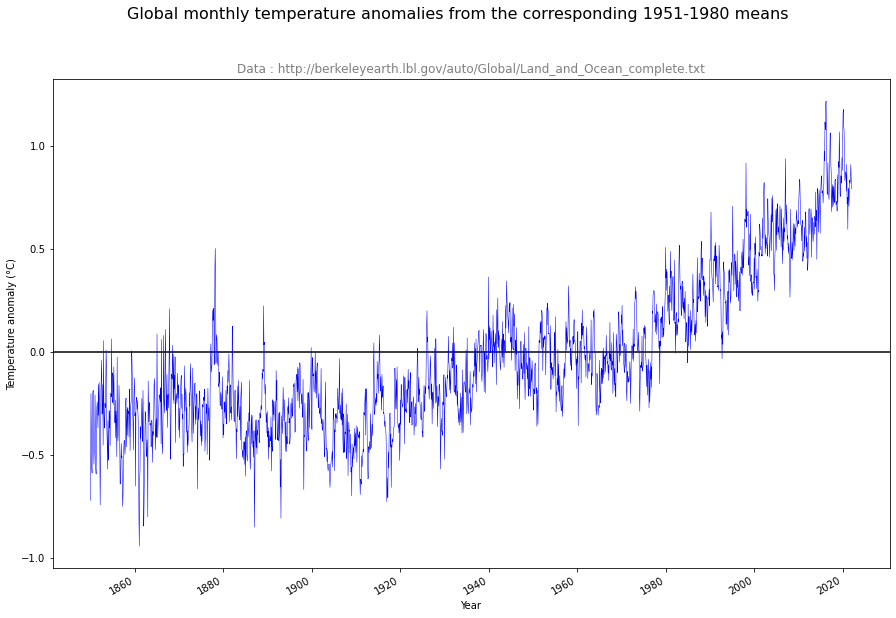

In [14]:
fig=plt.figure(figsize=(15, 10))
fig.suptitle('Global monthly temperature anomalies from the corresponding 1951-1980 means', fontsize=16)
plt.title('Data : http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt' ,
          fontsize=12, color='grey')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly (°C)')
plt.axhline(0, color='k')
ax = tg.plot(color='blue', linewidth=0.5, alpha=1)
plt.show()
figname='./figs/Berkeley_Tanom_monthly'
fig.savefig(figname+'.png',bbox_inches='tight')

(2064,)
(172, 12)


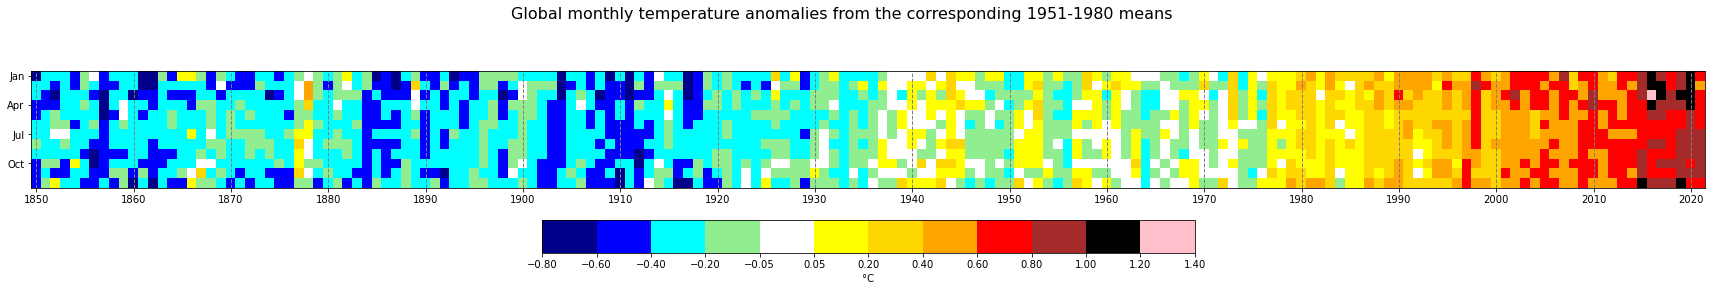

In [5]:
print(tg.shape)
tg2 = np.array(tg).reshape(172, 12)
print(tg2.shape)

bounds = [-0.8,-0.6,-0.4,-0.2,-0.05,0.05,0.2,0.4,0.6,0.8,1,1.2,1.4]
color =["darkblue","blue","cyan","lightgreen","white","yellow","gold", "orange", 
         "red", "brown", "black","pink"]
cmap = colors.ListedColormap(color)
norm = colors.BoundaryNorm(bounds, cmap.N)

fig=plt.figure(figsize=(30, 4))
fig.suptitle('Global monthly temperature anomalies from the corresponding 1951-1980 means', fontsize=16)
ax = fig.add_subplot(111)
im=ax.imshow(tg2.T, cmap=cmap, norm=norm)
cb=plt.colorbar(im, orientation="horizontal",shrink=0.75,ticks=bounds)
cb.set_label('°C')
mons=['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_yticks(np.arange(0,12,3))
ax.set_yticklabels(mons[::3]) #add month labels to the yaxis
ax.set_xticks(np.arange(0,172,10))
ax.set_xticklabels(years[::10]) #add year labels to the xaxis

xcoords = np.arange(0,172,10)
for xc in xcoords:
    plt.axvline(x=xc,linewidth=1, linestyle='--', color='grey')

plt.show()

figname='./figs/Berkeley_Tanom_monthly2'
fig.savefig(figname+'.png',bbox_inches='tight')

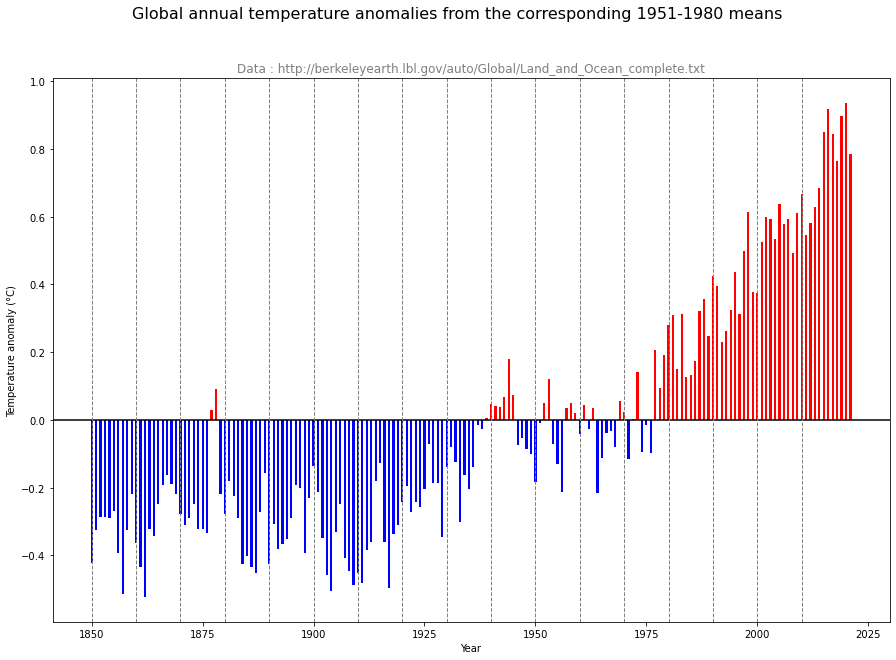

In [11]:
fig=plt.figure(figsize=(15, 10))
fig.suptitle('Global annual temperature anomalies from the corresponding 1951-1980 means', fontsize=16)
plt.title('Data : http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt',
          fontsize=12, color='grey')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly (°C)')
plt.axhline(0, color='k')
colormat=np.where(tg_annual>0, 'red','blue')
plt.bar(years, tg_annual, width=0.5, color=colormat)
xcoords = np.arange(1850,2020,10)
for xc in xcoords:
    plt.axvline(x=xc,linewidth=1, linestyle='--', color='grey')
plt.show()
figname='./figs/Berkeley_Tanom_annual'
fig.savefig(figname+'.png',bbox_inches='tight')

MovieWriter imagemagick unavailable; using Pillow instead.


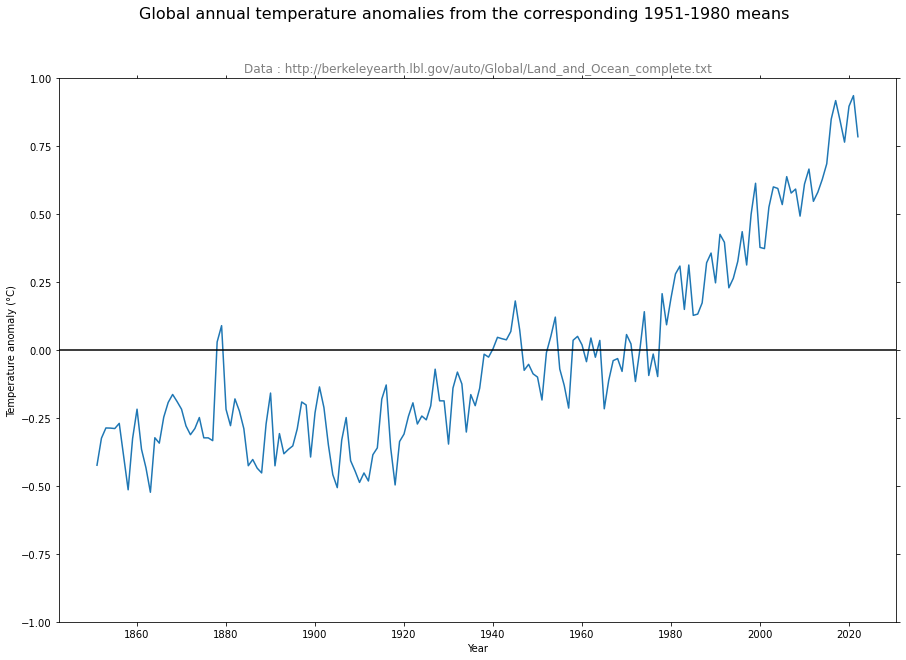

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
fig.suptitle('Global annual temperature anomalies from the corresponding 1951-1980 means', fontsize=16)

def animate(i):
    ax.cla() # clear the previous image
    ax.plot(tg_annual[:i]) # plot the line
    ax.set_ylim([-1, 1]) # fix the x axis
    ax.set_title('Year : '+str(i), loc='center', fontsize=8)
    plt.title('Data : http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt', fontsize=12, color='grey')
    plt.xlabel('Year')
    plt.ylabel('Temperature anomaly (°C)')
    plt.axhline(0, color='k')

anim = animation.FuncAnimation(fig, animate, frames = len(tg_annual) + 1, interval = 1, blit = False, repeat=False)
anim.save('./anim/Berkeley_Tanom_annual.gif', writer='imagemagick', fps=10)